<a href="https://colab.research.google.com/github/joshiamita1/autoencoder/blob/master/Denoise_AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter # TensorBoard support
import copy
# import torchvision module to handle image manipulation
import torchvision
import torchvision.transforms as transforms

# calculate train time, writing train data to files etc.
import time
import pandas as pd
import json
# https://github.com/andreasveit/triplet-network-pytorch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import torch
import pandas as pd
import torchvision
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from torch.autograd import Variable
from scipy.spatial import distance
from torchvision import datasets, transforms
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.metrics import average_precision_score
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier
from torch import nn, optim
from torch import nn, optim
import torch.utils.data as data
from PIL import Image
import os
import random
import os.path
import errno
import json
import math
import csv
import codecs
import numpy as np
from functional import reset_normal_param, LinearWeightNorm

from torch.nn.parameter import Parameter
import pdb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils.random import sample_without_replacement
import random
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from torch.autograd import Variable
import warnings 
warnings.filterwarnings('ignore')
def feature_extractor(data,dis):
    global output_dim
    feature_data = []
    for i in data:
        feature_data.append(dis(torch.from_numpy(np.array(i)).cuda()).detach().cpu().numpy().reshape(32,))
    return feature_data

def tsne_plot(dataset_main,dataset_main1,label_main,label_main1,title1,title2,classes):
    #TSNE Plot for glass dataset
    tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=400)
    # tsne_results = tsne.fit_transform(dataset_main)
    tsne_results1 = tsne.fit_transform(dataset_main1)
    df_subset = pd.DataFrame()
    # df_subset['X'] = tsne_results[:,0]
    # df_subset['y']=label_main
    # df_subset['Y'] = tsne_results[:,1]
    # plt.figure(figsize=(6,4))
    # plt.title(title1)
    # sns.scatterplot(
    #     x="X", y="Y",
    #     hue="y",
    #     palette=sns.color_palette("hls", classes),
    #     data=df_subset,
    #     legend="brief",
    #     alpha=1.0,
        
    # )
    plt.figure(figsize=(6,4))
    plt.title(title2)
    df_subset = pd.DataFrame()
    df_subset['X'] = tsne_results1[:,0]
    df_subset['y']=label_main1
    df_subset['Y'] = tsne_results1[:,1]
#     plt.figure(figsize=(6,4))
#     plt.title(title)
    sns.scatterplot(
        x="X", y="Y",
        hue="y",
        palette=sns.hls_palette(classes, l=.3, s=.8),
        data=df_subset,
        legend="brief",
        alpha=1.0,
       
    )

def evaluation(test_features,test_label,neigh):
#     predict_proba = neigh.predict_proba(test_features)
#     y_score = []
#     for i in range(len(predict_proba)):
#         y_score.append(predict_proba[i][test_label[i]])
#     report = metrics.classification_report(test_label, neigh.predict(test_features), output_dict=True)
#     df = pd.DataFrame(report).transpose()
#     mAP = np.mean(np.array(df["precision"]))
    predict_test = neigh.predict(test_features)
    mAP = 0
    den = 0
    num = 0
    for i in range(len(test_features)):
        
        if test_label[i] == predict_test[i]:
            den +=1
            num +=1
        else:
            den +=1
        mAP +=num/den
        
    return mAP/len(test_features),neigh.score(test_features,test_label)


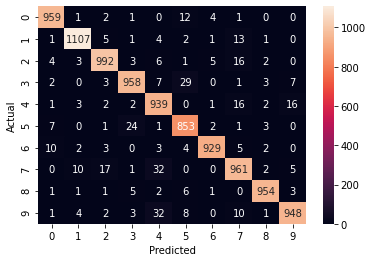

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_Actual':    test_label,
        'y_Predicted': neigh.predict(test_features)
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix,fmt='',annot=True)
plt.show()

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.033s...
[t-SNE] Computed neighbors for 10000 samples in 1.042s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.520201
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.119537
[t-SNE] KL divergence after 400 iterations: 2.264699


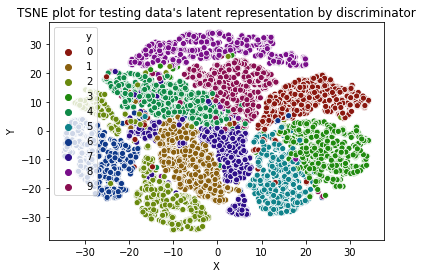

In [ ]:
tsne_plot(train_features,test_features,train_label,test_label,"TSNE plot for training data's latent representation by discriminator",
          "TSNE plot for testing data's latent representation by discriminator",10)

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=9)
neigh = neigh.fit(train_features, train_label)
mAP,acc = evaluation(test_features,test_label,neigh)
print("Accuracy on Test data : ",acc)
print("Mean Average Precision for test data : ",mAP)

Accuracy on Test data :  0.96
Mean Average Precision for test data :  0.9503874035138228


In [ ]:
train_features = feature_extractor(train_data,dis)
test_features = feature_extractor(test_data,dis)

In [ ]:
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# load the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)
train_data, val_set = torch.utils.data.random_split(train_data, [50000, 10000])

# Create training and test dataloaders
num_workers = 0
# how many samples per batch to load
batch_size = 64

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

In [ ]:
train_data = []
train_label = []
for (i,j) in train_loader:
    for k in range(len(i)):
        train_data.append(i[k].numpy())
        train_label.append(j[k].numpy().item())

In [ ]:
test_data = []
test_label = []
for (i,j) in test_loader:
    for k in range(len(i)):
        test_data.append(i[k].numpy())
        test_label.append(j[k].numpy().item())

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, input_dim = 28 ** 2, output_dim = 10):
        super(Discriminator, self).__init__()
        self.input_dim = input_dim
        self.layers = torch.nn.ModuleList([
            LinearWeightNorm(input_dim, 1500),
            LinearWeightNorm(1500, 1000),
            LinearWeightNorm(1000, 800),
            LinearWeightNorm(800, 400),
            LinearWeightNorm(400, 250)]
        )
        self.final = nn.Linear(250, output_dim)
#         self.real_fake = nn.Linear(output_dim,1)
#         self.sig = nn.Sigmoid()
        nn.init.xavier_uniform(self.final.weight)

    def forward(self, x, feature = False, cuda = False):
        x = x.view(-1, self.input_dim)
        noise = torch.randn(x.size()) * 0.3 if self.training else torch.Tensor([0])
        noise = noise.cuda()
        x = x + Variable(noise, requires_grad = False)
        for i in range(len(self.layers)):
            m = self.layers[i]
            x_f = F.relu(m(x))
            noise = torch.randn(x_f.size()) * 0.5 if self.training else torch.Tensor([0])
            noise = noise.cuda()
            x = (x_f + Variable(noise, requires_grad = False))
            x = x_f
        
        x_r =  self.final(x)
#         real_fake_p = self.sig(self.real_fake(x_r))
        if feature:
            return x_f, x_r
        return x_r
    

In [ ]:
dis = Discriminator(32)

In [ ]:
dis = torch.load("disc.pkl")

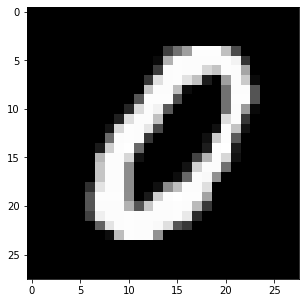

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# get one image from the batch
img = np.squeeze(images[0])

fig = plt.figure(figsize = (5,5)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')

In [ ]:
# import torch.nn as nn
# import torch.nn.functional as F
class autoencoder1(nn.Module):
    def __init__(self):
        super(autoencoder1, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding =1),
            nn.ReLU(True),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 16, 3, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 8, 3, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2, 2))
        

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(8, 8, 3, stride=2),
            nn.ReLU(True),
            nn.ConvTranspose2d(8, 16, 2, stride=2),
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 32, 2, stride=2),
            nn.ReLU(True),
            nn.Conv2d(32, 1, 3, padding=1),
            nn.Sigmoid())

    def forward(self, x):
        x = self.encoder(x)
        # print(x.shape)
        x = self.decoder(x)
        return x

In [ ]:

# initialize the NN
model = autoencoder1();
print(model);
model.cuda();
# model.cuda()
# specify loss function

#loss function and optimizer
criterion = nn.MSELoss();
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001);

autoencoder1(
  (encoder): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(8, 8, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(8, 16, kernel_size=(2, 2), stride=(2, 2))
    (3): ReLU(inplace=True)
    (4): ConvTranspose2d(16, 32, kernel_size=(2, 2), stride=(2, 2))
    (5): ReLU(inplace=True)
    (6): Conv2d(32, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): Sigmo

In [ ]:
def add_noise(img):
    noise = torch.randn(img.size()) * 0.2
    noisy_img = img + noise
    return noisy_img

In [ ]:
n_epochs = 50
# Model M1
# for adding noise to images
noise_factor=0.5
epoch_loss = []
for epoch in range(1, n_epochs+1):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data in train_loader:
        # _ stands in for labels, here
        # no need to flatten images
        images, _ = data
        
        ## add random noise to the input images
        noisy_imgs = images + noise_factor * torch.randn(*images.shape)
        
        # Clip the images to be between 0 and 1
        noisy_imgs = np.clip(noisy_imgs, 0., 1.)
        noisy_imgs = noisy_imgs.cuda()
      
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        ## forward pass: compute predicted outputs by passing *noisy* images to the model
        outputs= model(noisy_imgs)
        # calculate the loss
        # the "target" is still the original, not-noisy images
        loss = criterion(outputs, images.cuda())
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*images.size(0)

            
    # print avg training statistics 
    train_loss = train_loss/len(train_loader)
    epoch_loss.append(train_loss)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch, 
        train_loss
        ))
    val_loss = 0.0
    with torch.no_grad():
      for data in val_loader:
        images, labels = data

        ## add random noise to the input images
        noisy_imgs = images + noise_factor * torch.randn(*images.shape)

        # Clip the images to be between 0 and 1
        noisy_imgs = np.clip(noisy_imgs, 0., 1.)
        noisy_imgs = noisy_imgs.cuda()
        outputs = model(noisy_imgs)
        # print(outputs)
        loss1 = criterion(outputs, images.cuda())
        val_loss += loss1.item()*images.size(0)
    print("Epoch ",epoch," , Validation loss ",val_loss/len(val_loader))

Epoch: 1 	Training Loss: 7.999018
Epoch  1  , Validation loss  5.510554494371839
Epoch: 2 	Training Loss: 4.829833
Epoch  2  , Validation loss  4.565025886912255
Epoch: 3 	Training Loss: 3.983632
Epoch  3  , Validation loss  3.4781432618760757
Epoch: 4 	Training Loss: 3.312418
Epoch  4  , Validation loss  3.1134934505079963
Epoch: 5 	Training Loss: 3.020571
Epoch  5  , Validation loss  2.9159167196340623
Epoch: 6 	Training Loss: 2.853076
Epoch  6  , Validation loss  2.7558487395572056
Epoch: 7 	Training Loss: 2.712865
Epoch  7  , Validation loss  2.643506188681171
Epoch: 8 	Training Loss: 2.606138
Epoch  8  , Validation loss  2.545642918841854
Epoch: 9 	Training Loss: 2.514097
Epoch  9  , Validation loss  2.4572394562375015
Epoch: 10 	Training Loss: 2.433991
Epoch  10  , Validation loss  2.39225084007166
Epoch: 11 	Training Loss: 2.371241
Epoch  11  , Validation loss  2.3307842323734502
Epoch: 12 	Training Loss: 2.316395
Epoch  12  , Validation loss  2.279720593409933
Epoch: 13 	Traini

In [ ]:
torch.save(model,"best_model1")

In [ ]:
model = torch.load("best_model1")

In [ ]:
model

autoencoder1(
  (encoder): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(8, 8, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(8, 16, kernel_size=(2, 2), stride=(2, 2))
    (3): ReLU(inplace=True)
    (4): ConvTranspose2d(16, 32, kernel_size=(2, 2), stride=(2, 2))
    (5): ReLU(inplace=True)
    (6): Conv2d(32, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): Sigmo

In [ ]:
model1 =copy.deepcopy(model.encoder)

In [ ]:
model1

Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace=True)
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [ ]:
for param in model1.parameters():
    param.requires_grad = False

In [ ]:
# pretraining part 
model1.f1 = nn.Flatten(1, 2)
model1.f2 = nn.Flatten(1, 2)
model1.fc1 = nn.Linear(72,40)
model1.relu1 = nn.ReLU()
model1.fc2 =  nn.Linear(40,20)
model1.relu2 = nn.ReLU()
model1.fc3 = nn.Linear(20,10)
model1.sig = nn.Softmax()
model1.cuda()

Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace=True)
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (f1): Flatten()
  (f2): Flatten()
  (fc1): Linear(in_features=72, out_features=40, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=40, out_features=20, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=20, out_features=10, bias=True)
  (sig): Softmax(dim=None)
)

In [ ]:
# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# load the training and test datasets
train_data = datasets.FashionMNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.FashionMNIST(root='data', train=False,
                                  download=True, transform=transform)

train_data, val_set = torch.utils.data.random_split(train_data, [50000, 10000])
# Create training and test dataloaders
num_workers = 0
# how many samples per batch to load
batch_size = 64

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

In [ ]:

#loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model1.parameters(), lr=0.0001)

In [ ]:
n_epochs = 120
# Model M3
# for adding noise to images
noise_factor=0.5
epoch_loss = []
for epoch in range(1, n_epochs+1):
  # monitor training loss
  train_loss = 0.0

  ###################
  # train the model #
  ###################
  for data in train_loader:
      # _ stands in for labels, here
      # no need to flatten images
      images, labels = data
      
      ## add random noise to the input images
      noisy_imgs = images + noise_factor * torch.randn(*images.shape)
      
      # Clip the images to be between 0 and 1
      noisy_imgs = np.clip(noisy_imgs, 0., 1.)
      noisy_imgs = noisy_imgs.cuda()
      # print(noisy_imgs.shape)
      # clear the gradients of all optimized variables
      optimizer.zero_grad()
      # the "target" is still the original, not-noisy images

      output = model1(noisy_imgs)
      loss = criterion(output, labels.cuda())
      train_loss += loss.item()
      optimizer.zero_grad()
      loss.backward()
      
      optimizer.step()
  print("Epoch : "+str(epoch)+" , Loss : ",str(train_loss/len(train_loader)))
  correct = 0
  total =0
  with torch.no_grad():
    for data in val_loader:
        images, labels = data
      
        ## add random noise to the input images
        noisy_imgs = images + noise_factor * torch.randn(*images.shape)
        
        # Clip the images to be between 0 and 1
        noisy_imgs = np.clip(noisy_imgs, 0., 1.)
        noisy_imgs = noisy_imgs.cuda()
        outputs = model1(noisy_imgs)
        # print(outputs)
        _, predicted = torch.max(outputs.data, 1)
        # print(predicted)
        total += labels.size(0)
        correct += (predicted.cpu() == labels).sum().item()
  val_loss = 0.0
  with torch.no_grad():
    for data in val_loader:
      images, labels = data

      ## add random noise to the input images
      noisy_imgs = images + noise_factor * torch.randn(*images.shape)

      # Clip the images to be between 0 and 1
      noisy_imgs = np.clip(noisy_imgs, 0., 1.)
      noisy_imgs = noisy_imgs.cuda()
      outputs = model1(noisy_imgs)
      # print(outputs)
      loss1 = criterion(outputs, labels.cuda())
      val_loss += loss1.item()*images.size(0)
  print("Epoch ",epoch," ,Validation Loss : ",val_loss/len(val_loader))
  if epoch%2==0:
    print("Epoch ",epoch,'Validation Accuracy :  %f %%' % (100 * (correct / float(total))))

Epoch : 1 , Loss :  2.2457726724312432
Epoch  1  ,Validation Loss :  138.77044633998992
Epoch : 2 , Loss :  2.0693566759529016
Epoch  2  ,Validation Loss :  128.25706230455143
Epoch  2 Validation Accuracy :  47.490000 %
Epoch : 3 , Loss :  1.9818433873793657
Epoch  3  ,Validation Loss :  125.19547773470545
Epoch : 4 , Loss :  1.9363642228228966
Epoch  4  ,Validation Loss :  122.53914351979638
Epoch  4 Validation Accuracy :  57.460000 %
Epoch : 5 , Loss :  1.9031540823104742
Epoch  5  ,Validation Loss :  120.6291730722804
Epoch : 6 , Loss :  1.8806602271926371
Epoch  6  ,Validation Loss :  119.66868266937838
Epoch  6 Validation Accuracy :  61.490000 %
Epoch : 7 , Loss :  1.8653314290449137
Epoch  7  ,Validation Loss :  118.74791128316502
Epoch : 8 , Loss :  1.85479911956031
Epoch  8  ,Validation Loss :  118.29911900174086
Epoch  8 Validation Accuracy :  62.410000 %
Epoch : 9 , Loss :  1.846745716031555
Epoch  9  ,Validation Loss :  117.61959663925657
Epoch : 10 , Loss :  1.8380018039737

In [ ]:
# To get the performance of M3 Classfication model
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
      
        ## add random noise to the input images
        noisy_imgs = images + noise_factor * torch.randn(*images.shape)
        
        # Clip the images to be between 0 and 1
        noisy_imgs = np.clip(noisy_imgs, 0., 1.)
        noisy_imgs = noisy_imgs.cuda()
        outputs = model1(noisy_imgs)
        # print(outputs)
        _, predicted = torch.max(outputs.data, 1)
        # print(predicted)
        total += labels.size(0)
        correct += (predicted.cpu() == labels).sum().item()

print('Accuracy of the network on the FashionMNIST(M2 model) test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the FashionMNIST(M2 model) test images: 70 %


In [ ]:
torch.save(model1,"m3")

In [ ]:
model1 = torch.load("m3")

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc = nn.Linear(7*7*32, 10)
        
    def forward(self, x):
        out = self.layer1(x)

        out = self.layer2(out)

        out = out.view(out.size(0), -1)

        out = self.fc(out)

        return out

In [ ]:
#instance of the Conv Net i.e, M2 (Classification model)
cnn = CNN();
cnn.cuda()
#loss function and optimizer
criterion = nn.CrossEntropyLoss();
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.0001);

In [ ]:
epoch_loss = [];

num_epochs = 10
for epoch in range(num_epochs):
    train_loss =0.0
    for i, (images, labels) in enumerate(train_loader):
        
        # Forward + Backward + Optimize
       
        optimizer.zero_grad()
        outputs = cnn(images.cuda())
        loss = criterion(outputs, labels.cuda())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*images.size(0)
        val_loss = 0.0
        
      
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = cnn(images.cuda())
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted.detach().cpu() == labels).sum().item()

    print('Validation Accuracy  : %d %%' % (
        100 * correct / total))
    val_loss = 0.0
    with torch.no_grad():
          for data in val_loader:
            images, labels = data
            ## add random noise to the input images
            outputs = cnn(images.cuda())
            loss1 = criterion(outputs, labels.cuda())
            val_loss += loss1.item()*images.size(0)
    print("Epoch ",epoch+1," ,Validation Loss : ",val_loss/len(val_loader))
    train_loss = train_loss/len(train_loader)
    epoch_loss.append(train_loss)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch+1,train_loss))

Validation Accuracy  : 88 %
Epoch  1  ,Validation Loss :  18.0404765681856
Epoch: 1 	Training Loss: 17.498278
Validation Accuracy  : 89 %
Epoch  2  ,Validation Loss :  17.520253023524194
Epoch: 2 	Training Loss: 16.570643
Validation Accuracy  : 89 %
Epoch  3  ,Validation Loss :  17.1211244771435
Epoch: 3 	Training Loss: 15.809656
Validation Accuracy  : 89 %
Epoch  4  ,Validation Loss :  16.814450748407157
Epoch: 4 	Training Loss: 15.162118
Validation Accuracy  : 89 %
Epoch  5  ,Validation Loss :  16.573293849161477
Epoch: 5 	Training Loss: 14.590688
Validation Accuracy  : 89 %
Epoch  6  ,Validation Loss :  16.378009288933626
Epoch: 6 	Training Loss: 14.077194
Validation Accuracy  : 89 %
Epoch  7  ,Validation Loss :  16.220395967459222
Epoch: 7 	Training Loss: 13.614837
Validation Accuracy  : 90 %
Epoch  8  ,Validation Loss :  16.110124167363356
Epoch: 8 	Training Loss: 13.187455
Validation Accuracy  : 90 %
Epoch  9  ,Validation Loss :  16.009064808772628
Epoch: 9 	Training Loss: 12.789

In [ ]:
torch.save(cnn,"M2")

In [ ]:
# To get the performance of M2 Classfication model
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = cnn(images.cuda())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted.detach().cpu() == labels).sum().item()

print('Accuracy of the network on the FashionMNIST test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the FashionMNIST test images: 90 %
